<div style="color:#00BFFF">

# Nowcasting Consumer Expenditure: 

### Load, Clean and Preprocess Data

<div style="color:#00BFFF">

---

##### About the Data

**Primary Dataset Description**

**Short Description:** The primary dataset is "Table 1.1.5. Gross Domestic Product" from the U.S. Bureau of Economic Analysis. It comprises seasonally adjusted quarterly U.S. Gross Domestic Product (GDP) rates in billions of dollars.

**Relevance:** The dataset's detailed information on U.S. GDP over several years is integral to the project's goal of nowcasting consumption. The data's granularity and time-series nature will allow for comprehensive analysis and identification of trends, making it pivotal for the project's success.

**Data frequency:** The data reflecting the economic output of the United States is crucial for analyzing economic trends and growth patterns. The presentation of data is done quarterly by the GDP component.

**Location:** Available at [U.S. Bureau of Economic Analysis](https://apps.bea.gov/iTable/?reqid=19&step=2&isuri=1&categories=survey&_gl=1*j1lvlb*_ga*MTk0MDMyMjk0MC4xNzA1NDk1NTk4*_ga_J4698JNNFT*MTcwNTQ5NTU5OC4xLjEuMTcwNTQ5NzA2MC42MC4wLjA.#eyJhcHBpZCI6MTksInN0ZXBzIjpbMSwyLDMsM10sImRhdGEiOltbImNhdGVnb3JpZXMiLCJTdXJ2ZXkiXSxbIk5JUEFfVGFibGVfTGlzdCIsIjUiXSxbIkZpcnN0X1llYXIiLCIxOTQ3Il0sWyJMYXN0X1llYXIiLCIyMDIzIl0sWyJTY2FsZSIsIi05Il0sWyJTZXJpZXMiLCJRIl1dfQ==). ([BEA](https://apps.bea.gov/iTable/?reqid=19&step=2&isuri=1&categories=survey&_gl=1*j1lvlb*_ga*MTk0MDMyMjk0MC4xNzA1NDk1NTk4*_ga_J4698JNNFT*MTcwNTQ5NTU5OC4xLjEuMTcwNTQ5NzA2MC42MC4wLjA.#eyJhcHBpZCI6MTksInN0ZXBzIjpbMSwyLDMsM10sImRhdGEiOltbImNhdGVnb3JpZXMiLCJTdXJ2ZXkiXSxbIk5JUEFfVGFibGVfTGlzdCIsIjUiXSxbIkZpcnN0X1llYXIiLCIxOTQ3Il0sWyJMYXN0X1llYXIiLCIyMDIzIl0sWyJTY2FsZSIsIi05Il0sWyJTZXJpZXMiLCJRIl1dfQ==))

**Format:** CSV

**Access Method:** The dataset is readily available and can be easily accessed and downloaded directly from the U.S. Bureau of Economic Analysis website.


**Secondary Datasets**

**Federal Reserve Economic Data (FRED)**

**Short Description:** This dataset is sourced from the Federal Reserve Bank of St. Louis's FRED macroeconomic database. It contains a variety of economic data points available at monthly intervals, with a particular focus on US GDP data. The data covers consumer spending indicators, a crucial component of the Gross Domestic Product (GDP).

**Relevance**: Complements the primary dataset with additional economic indicators, useful for cross-referencing and correlation analysis.

**Data frequency:** The monthly frequency of this dataset provides a more detailed temporal resolution than the primary dataset, which may reveal more immediate economic trends. This granularity will be useful in identifying more immediate proxies for nowcasting.

**Estimated Size**: 0.6MB

**Location**: https://research.stlouisfed.org/econ/mccracken/fred-databases/

**Format**: CSV.

**Access Method**: Direct download.

<div style="color:#00BFFF">

---

##### Setup Environment and import libraries

In [1]:
# Activate the virtual environment by running in terminal: 
# python -m venv myenv
# source myenv/bin/activate
# ! source /myenv/bin/activate

# ------- PIP INSTALLS -------
# ! pip install --upgrade pip
# ! pip install -r requirements.txt

# Run the imports file
%matplotlib inline

In [2]:
# ------- Standard Library Imports -------
import warnings
from pprint import pprint
# from typing import List

# ------- Third-Party Library Imports -------
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt

# Remove warnings
warnings.filterwarnings('ignore')

# Set the display options
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  

/var/folders/30/bhymp02j1fb47cmvs80_1b4m0000gn/T/ipykernel_61640/615382996.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<div style="color:#00BFFF">

---

##### Load and preprocesses BEA Dataset


**Loads and preprocesses** the GDP data from a CSV file. Process a DataFrame to create a structured description column.

**Handling Missing Values**: Utilize median imputation for missing values, as it's less influenced by outliers and provides a more representative central tendency.

**Outliers and Anomalies**: Apply Interquartile Range (IQR) or Z-score analysis to identify and address outliers. This step ensures the integrity of data by minimizing the impact of extreme values.

In [3]:
from utils.bea_load_data import load_and_preprocess_gdp_data,create_structured_description, create_short_description, transform_date_formats

file_path = './data/bea/bea_usgdp.csv'

# Load and preprocess the data
pce_df = load_and_preprocess_gdp_data(file_path)

# create hierarchy for PCE data
pce_df = create_structured_description(pce_df)

# create short description for PCE data
pce_df = create_short_description(pce_df)

#extract only PCE data
pce_df = pce_df[pce_df['short_description'].str.contains('PCE')]

# Transform the date formats
pce_df = transform_date_formats(pce_df)

#save the data
pce_df.to_csv('./results/bea/bea_pce_original.csv', index=True)

In [4]:
pce_df.head()

short_description,PCE,PCE_Goods,PCE_Goods_Durable_goods,PCE_Goods_Nondurable_goods,PCE_Services
1947Q1,156.2,95.6,20.7,74.9,60.6
1947Q2,160.0,98.2,21.4,76.9,61.8
1947Q3,163.5,100.4,21.8,78.6,63.1
1947Q4,167.7,103.5,23.5,80.0,64.2
1948Q1,170.4,105.1,23.5,81.5,65.3


<div style="color:#00BFFF">

---

##### Visualy inspect the BEA data


The rate of change is typically calculated as 
(
Current Value
−
Previous Value
Previous Value
)
×
100
%
( 
Previous Value
Current Value−Previous Value
​	
 )×100%, which can be easily computed using the pct_change() function in pandas, and then multiplying by 100 to convert it to a percentage.

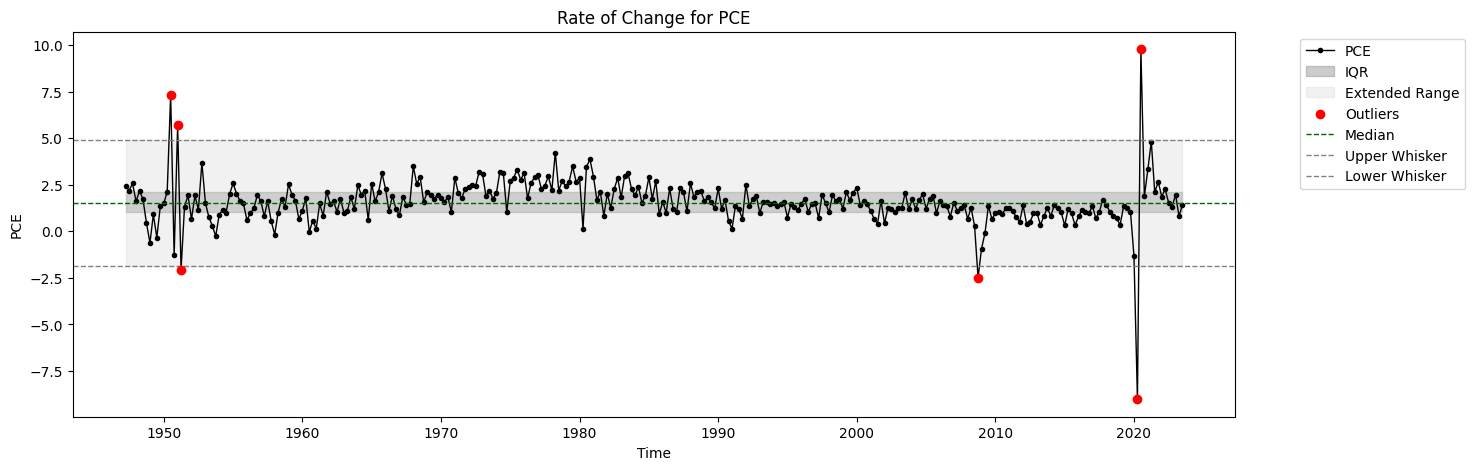

In [5]:
from pandas.tseries.offsets import MonthBegin
from utils.visualisation import analyze_and_plot

# Call the function from utils/visualisations and store the result in result
result = analyze_and_plot(pce_df,'PCE')

**Interpretation of Scatter Plots with Regression Lines:**

Scatter plots with regression lines for each component ('PCE_Goods_Durable_goods', 'PCE_Goods_Nondurable_goods', 'PCE_Services') against 'PCE' illustrate the linear relationships between these components and the total PCE. The regression lines provide a visual indicator of the direction, strength, and linearity of these relationships.

**Interpretation of the Correlation Matrix:**

The correlation matrix, particularly its visualization through the heatmap, shows the Pearson correlation coefficients between 'PCE' and its components. The coefficients near 1 indicate a very strong positive linear relationship.

<div style="color:#00BFFF">

---

##### Loading the FRED data

The `load_fredmd_data` function, below, performs the following actions, once for the FRED-MD dataset and once for the FRED-QD dataset:

1. Based on the `vintage` argument, it downloads a particular vintage of these datasets from the base URL https://files.stlouisfed.org/files/htdocs/fred-md into the `orig_m` variable.
2. Extracts the column describing which transformation to apply, shortname and description mappings
3. Extracts the observation date (from the "sasdate" column) and uses it as the index of the dataset.

In [6]:
def load_fredmd_data(vintage):
    """
    Loads and processes the FRED-MD data.
    """
    # Define the base URL for the FRED-MD dataset
    base_url = 'https://files.stlouisfed.org/files/htdocs/fred-md'

    # Load the dataset for the specified 'vintage', dropping rows that are entirely NA
    fred_orig = pd.read_csv(f'{base_url}/monthly/{vintage}.csv').dropna(how='all')

    # Extract transformation codes (second column onwards) from the first row
    transform_info = fred_orig.iloc[0, 1:]

    # Drop the first row (containing transformation info) from the dataset
    fred_orig = fred_orig.iloc[1:]

    # Convert 'sasdate' column to a PeriodIndex with monthly frequency for time-series analysis
    fred_orig.index = pd.PeriodIndex(fred_orig.sasdate.tolist(), freq='M')

    # Remove the 'sasdate' column as it's now set as the index
    fred_orig.drop('sasdate', axis=1, inplace=True)

    # Return the processed data and the transformation information
    return fred_orig, transform_info


# Load data for the current vintage and unpack into original data and transformation info
fred, transform_info = load_fredmd_data("current")

# Save the original data
fred.to_csv('./results/fred/fred_monthly_orig.csv', index=True)

fred.head(2)

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,HWI,HWIURATIO,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,PERMIT,PERMITNE,PERMITMW,PERMITS,PERMITW,ACOGNO,AMDMNOx,ANDENOx,AMDMUOx,BUSINVx,ISRATIOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,NONREVSL,CONSPI,S&P 500,S&P: indust,S&P div yield,S&P PE ratio,FEDFUNDS,CP3Mx,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,COMPAPFFx,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,TWEXAFEGSMTHx,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAUCSL,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
1959-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9665,23.3891,22.2688,31.7011,19.0149,38.1501,8.0434,20.0387,11.9952,30.6591,20.8382,19.9173,34.6654,80.1973,1357,0.333579,67936,63868,6.0,16.3,1574,1169,1396,594,802,291078,52478,18796,713.0,2993,14998,8740,6258,33682,10774,2568.7,5350.3,2418,8105,39.8,2.5,40.2,1657,350,452,505,350,NaN,NaN,NaN,NaN,NaN,NaN,14716.48296,NaN,42620.34624,84889.55898,1.560000,138.9,286.6,987.9,50500,18.9,18300,35.2130,24.9242,48.96116,0.124965,55.62,59.30,3.158342,18.445741,2.48,3.30,2.82,3.09,3.36,4.01,4.02,4.12,4.87,0.82,0.34,0.61,0.88,1.53,1.54,1.64,2.39,NaN,4.3122,359.8417,2.8065,0.9671,33.1,33.4,30.6,31.6,3.0,32.5,29.01,44.8,29.3,21.1,33.3,38.1,22.9,28.9,30.7,29.6,15.164,63.517,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3966,23.7048,22.4617,31.9337,19.1147,38.5147,8.1510,20.6733,12.5477,31.1959,21.2213,19.8631,34.1932,81.4428,1421,0.358386,67649,63684,5.9,15.5,1554,1164,1277,545,732,282958,52688,18890,704.2,2980,15115,8839,6276,33798,10816,2575.4,5381.3,2420,8116,39.7,2.6,40.3,1667,346,469,508,344,NaN,NaN,NaN,NaN,NaN,NaN,15400.24873,NaN,43677.15151,85181.81131,1.539338,139.4,287.7,992.1,49800,18.6,18100,35.2201,25.2270,49.51371,0.125765,54.77,58.33,3.219518,18.418119,2.43,3.26,2.70,3.13,3.54,3.96,3.96,4.14,4.89,0.83,0.27,0.70,1.11,1.53,1.53,1.71,2.46,NaN,4.3133,359.8417,2.8093,0.9748,33.2,33.4,30.7,31.4,3.0,32.5,29.00,44.7,29.4,21.2,33.3,38.1,23.0,28.9,30.7,29.6,15.179,63.554,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN


<div style="color:#00BFFF">

---

##### Mapping FRED indices to Economic Data groups for analysis per economic group

In this section, we import and organize the definitions of economic variables. 
These definitions are loaded from CSV files corresponding to the FRED-MD and FRED-QD databases. 
This process ensures that we have a clear and concise understanding of each economic variable in our dataset, which is essential for accurate analysis and interpretation of the data.

In [7]:
# Function for Column Name Mapping
def map_column_names(data, defn_file):
    """
    Maps FRED-MD column names to their descriptions.
    """
    # Load the definitions file, ignoring encoding errors
    defn = pd.read_csv(defn_file, encoding_errors='ignore')

    # Set the 'fred' column as the index of the definitions DataFrame
    defn.index = defn.fred

    # Filter the definitions to include only those variables present in the data columns
    defn = defn.loc[data.columns.intersection(defn.fred), :]

    # Create a dictionary mapping FRED-MD variable names to their descriptions
    map_dict = defn['description'].to_dict()

    # Replace the names of columns in the dataset with the descriptions from the map
    return data[map_dict.keys()].rename(columns=map_dict),defn

# Map column names for fred_original 
column_defn_file = './data/FRED/FRED_Definitions_Mapping/fredmd_definitions.csv'
fred_orig,defn = map_column_names(fred, column_defn_file)

fred_orig.head(2)

,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,"Housing Starts, Northeast","Housing Starts, Midwest","Housing Starts, South","Housing Starts, West",New Private Housing Permits (SAAR),"New Private Housing Permits, Northeast (SAAR)","New Private Housing Permits, Midwest (SAAR)","New Private Housing Permits, South (SAAR)","New Private Housing Permits, West (SAAR)",New Orders for Consumer Goods,New Orders for Durable Goods,New Orders for Nondefense Capital Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Sentiment Index,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks
1959-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9

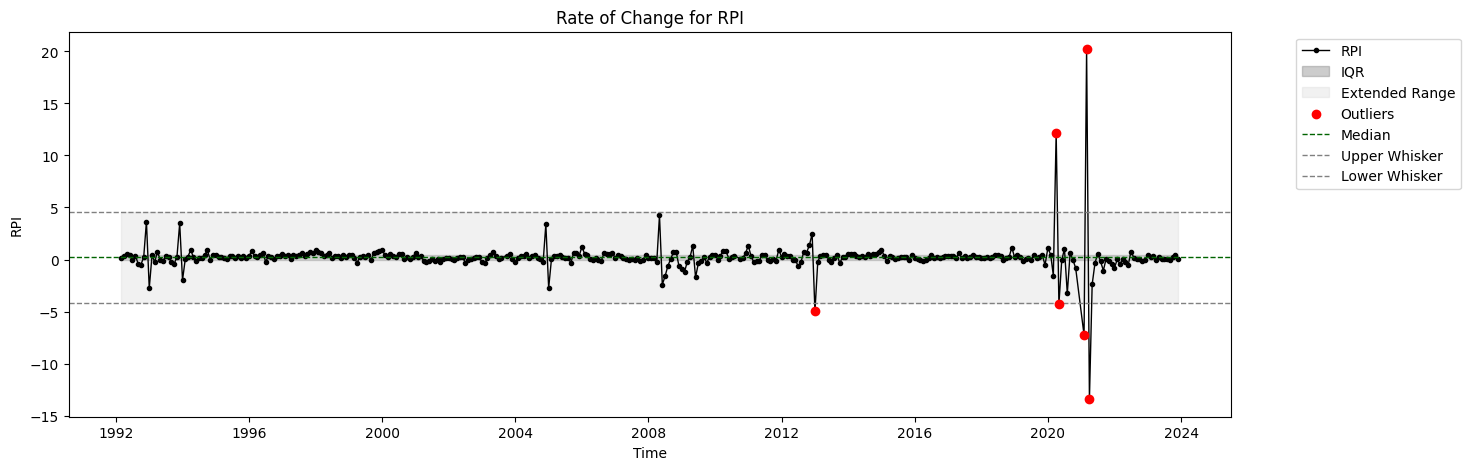

In [8]:
analyze_and_plot(fred,'RPI')
# analyze_and_plot(fred,'INDPRO')
# analyze_and_plot(fred,'UNRATE')
# analyze_and_plot(fred,'UMCSENTx')

<div style="color:#00BFFF">

---

##### Frequency Alignment: 


- Transform the monthly economic indices from FRED to a quarterly format to align with the BEA’s quarterly GDP data. Calculate the sum or average (as appropriate) of monthly values within each quarter. 


In [9]:
# Function to transform monthly date to quarterly date in 'YYYYQX' format
def transform_to_quarterly(date_str):
    year, month = date_str.split('-')
    quarter = (int(month) - 1) // 3 + 1
    return f"{year}Q{quarter}"

# Convert index to string to apply string methods
fred_orig.index = fred_orig.index.astype(str)

# Selecting only the last month of each quarter from the monthly dataset
# The last month of each quarter are March (03), June (06), September (09), December (12)
fred_orig_filtered = fred_orig[fred_orig.index.str.endswith(('03', '06', '09', '12'))]

# Transform the index to the quarterly format and create a new 'Quarter' column
fred_orig_filtered['Quarter'] = fred_orig_filtered.index.map(transform_to_quarterly)

# Set the new 'Quarter' column as the index
fred_orig_filtered.set_index('Quarter', inplace=True)

# Checking the date range of the monthly dataset
monthly_date_range = fred_orig_filtered.index.min(), pce_df.index.max()

# Checking the date range of the PCE dataset
pce_date_range = pce_df.index.min(), pce_df.index.max()

monthly_date_range, pce_date_range



(('1959Q1', '2023Q3'), ('1947Q1', '2023Q3'))

<div style="color:#00BFFF">

---

##### Quarterly Data Integration


- We will merge quarterly BEA PCE rate of change data framework with the FRED transformed quarter-over-quarter rate of change into a unified framework using pandas, ensuring seamless integration and compatibility. 
- This step is vital for consolidating different economic indicators into a single, comprehensive analysis.

In [10]:
# drop columns PCE_Goods	PCE_Goods_Durable_goods	PCE_Goods_Nondurable_goods	PCE_Services
pce_df.drop(['PCE_Goods', 'PCE_Goods_Durable_goods', 'PCE_Goods_Nondurable_goods', 'PCE_Services'], axis=1, inplace=True)

#drop rows in pce_df that are not in fred_orig_filtered
pce_df = pce_df[pce_df.index.isin(fred_orig_filtered.index)]

# Merging the datasets on the 'Quarter' column
joined_dataset = pd.merge(pce_df, fred_orig_filtered, left_index=True, right_index=True, how='left')

# Display the first few rows of the merged dataset
joined_dataset.to_csv('fred_pce_joined.csv', index=True)



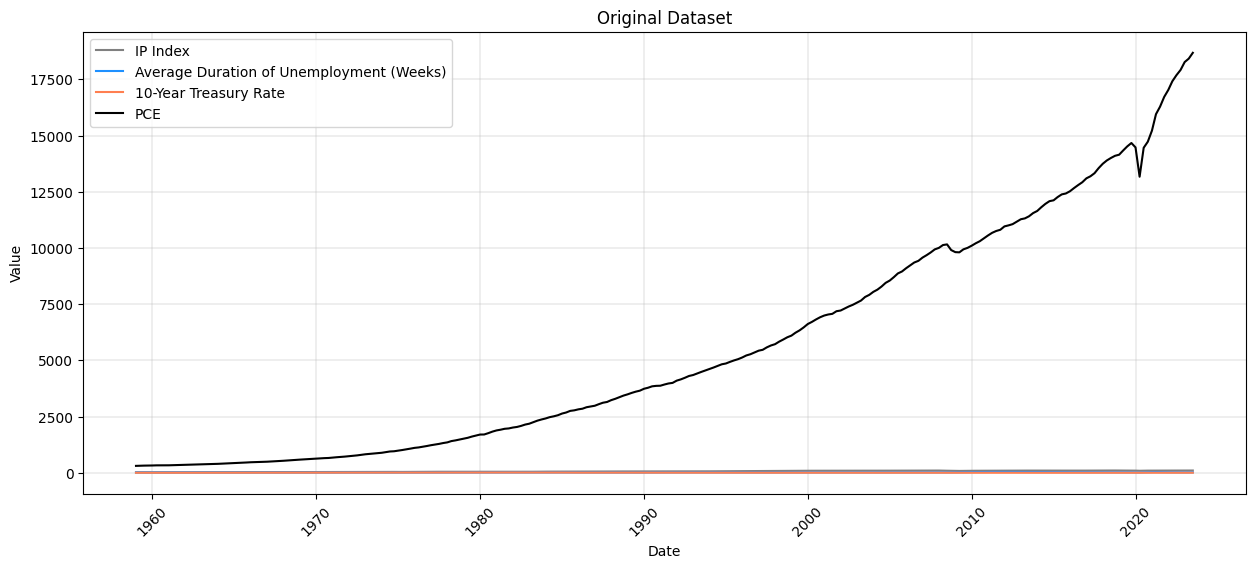

In [11]:

from matplotlib.dates import DateFormatter, YearLocator
from utils.visualisation import plot_dataset


#plot after each transformation
plot_dataset(joined_dataset, "Original Dataset")

<div style="color:#00BFFF">

---

##### Filter Date Range

In [12]:
import pandas as pd

def convert_index_to_datetime(index):
        """Convert 'YYYYQX' format to datetime, or return the input if it's already a datetime."""
        
        if isinstance(index, pd.Timestamp):
            return index  # Return the input directly if it's already a Timestamp
        
        year = int(index[:4])
        quarter = int(index[5])
        month = (quarter - 1) * 3 + 1  # Convert quarter to month
        
        return pd.Timestamp(year=year, month=month, day=1)

# Assuming joined_dataset's index is initially in 'YYYYQX' format,
# Ensure the index is in datetime format
joined_dataset.index = pd.to_datetime(joined_dataset.index.map(convert_index_to_datetime))

# Now, filter the data to include only observations from 1960 onwards
# This leverages the datetime format of the index for comparison
joined_dataset = joined_dataset[joined_dataset.index.year >= 1960]

# You can now proceed to use the plot_dataset function as before
# plot_dataset(joined_dataset, "Filtered Dataset")


<div style="color:#00BFFF">

---

##### Inspecting and Handling Missing Values

In [13]:
def report_missing_values(df):
    # Check for NaN values in the dataset
    nan_summary = df.isna().sum()

    # Display columns with NaNs and their count, if any
    columns_with_nans = nan_summary[nan_summary > 0]
    if not columns_with_nans.empty:
        print("\nColumns with NaN values and their count:")
        print(columns_with_nans)
    else:
        print("\nNo NaN values found.")

report_missing_values(joined_dataset)


Columns with NaN values and their count:
New Orders for Consumer Goods                         128
New Orders for Nondefense Capital Goods                32
S&P s Composite Common Stock: Dividend Yield            1
S&P s Composite Common Stock: Price-Earnings Ratio      1
Consumer Sentiment Index                               72
dtype: int64


In [14]:
def drop_columns_with_many_nans(df, threshold=30):
    """
    Drops columns from the dataframe that have more than a specified number of NaN values.
    """

    # Calculate the count of NaN values per column
    nan_counts = df.isna().sum()
    
    # Identify columns that exceed the threshold for NaN values
    columns_to_drop = nan_counts[nan_counts > threshold].index
    
    # Drop these columns from the dataframe
    df_dropped = df.drop(columns=columns_to_drop)
    
    # Optionally, print the names of dropped columns for review
    if len(columns_to_drop) > 0:
        print(f"Dropped {len(columns_to_drop)} columns with more than {threshold} NaN values:")
        print(columns_to_drop.tolist())
    else:
        print("No columns were dropped based on the threshold criteria.")
    
    return df_dropped


joined_dataset = drop_columns_with_many_nans(joined_dataset, threshold=30)


Dropped 3 columns with more than 30 NaN values:
['New Orders for Consumer Goods', 'New Orders for Nondefense Capital Goods', 'Consumer Sentiment Index']


<div style="color:#00BFFF">

---

##### Inspect and Handle Outliers

Handles outliers in a DataFrame column based on the measure type and reports the removed outliers.

Args:
df (DataFrame): The DataFrame containing the data.
column (str): The name of the column to process.
measure (str): The type of measure for the column.

Returns:
DataFrame, DataFrame: The DataFrame with outliers handled, and DataFrame of removed outliers.

In [15]:
# Create a dictionary mapping FRED-MD variable names to their descriptions
measuremnet_info = pd.read_csv('./data/fredmd_information.csv')
measure_type_dict = measuremnet_info.set_index('description')['measure'].to_dict()

# Add "PCE": 'billions of dollars' to the dictionary
measure_type_dict["PCE"] = 'billions of dollars'

#display the measure types in a dataframe
unique_measures = pd.DataFrame.from_dict(measure_type_dict, orient='index', columns=['measure'])
#unique_measures.head()

In [16]:
def handle_outliers(df, column, measure):
    
    outlier_values = pd.DataFrame()
    # Z-score method for dollar values and indexes
    z = np.abs((df[column] - df[column].mean()) / df[column].std())
    threshold = 3  # Typically, a threshold of 3 is used
    mask = z > threshold
    outlier_values = df.loc[mask, column].reset_index()
    df.loc[mask, column] = np.nan

    return df, outlier_values

In [17]:

# Initialize a dictionary to store outlier data for each column
all_outliers = {}
columns_with_outliers = {}

# Loop through each column in fred_orig and apply the outlier handling function
for column in joined_dataset.columns:
    # Get the measure type for the column
    measure_type = measure_type_dict.get(column)
    if measure_type:
        # Apply the outlier handling function
        fred_orig, outliers = handle_outliers(joined_dataset, column, measure_type)
        
        # Store the outliers if any
        if not outliers.empty:
            all_outliers[column] = outliers
            # columns_with_outliers.append(column)
            #add to dictionary columns_with_outliers
            columns_with_outliers[column] = outliers.count()[1]

# convert dictionary to dataframe and sort by number of outliers
columns_with_outliers = pd.DataFrame.from_dict(columns_with_outliers, orient='index', columns=['outliers']).sort_values(by='outliers', ascending=False)
print(columns_with_outliers)

                                                    outliers
M1 Money Stock                                            14
Civilians Unemployed - 15 Weeks & Over                     9
Civilians Unemployed for 27 Weeks and Over                 9
Help-Wanted Index for United States                        8
S&P s Common Stock Price Index: Industrials                7
S&P s Common Stock Price Index: Composite                  6
5-Year Treasury C Minus FEDFUNDS                           6
1-Year Treasury C Minus FEDFUNDS                           6
Total Reserves of Depository Institutions                  5
All Employees: Mining and Logging: Mining                  5
Average Duration of Unemployment (Weeks)                   5
Ratio of Help Wanted/No. Unemployed                        5
Reserves Of Depository Institutions                        5
6-Month Treasury C Minus FEDFUNDS                          4
3-Month Treasury C Minus FEDFUNDS                          4
6-Month Treasury Bill:  

<div style="color:#00BFFF">

---

##### Unit conversion


**Ensure consistent data scales** by standardizing measurement units across economic indicators.

**Steps**

1. **Import Metadata**
   - Load variable metadata from `fredmd_information.csv`.
   - Convert to a dictionary mapping variable descriptions to measurement units.

2. **Update Measurement Info**
   - Manually add measurement info for **PCE** as 'billions of dollars'.

3. **Visualize Measurement Units**
   - Create a DataFrame to display measurement units for each variable.
   - Facilitates understanding of data scale and units.

4. **Standardize Data Scales**
   - Define conversion factors to standardize data (e.g., converting thousands to millions, millions to billions).
   - Apply to relevant variables to ensure consistent analysis base.

5. **Mapping and Conversion**
   - Map dataset columns to their measurement units.
   - Apply conversion factors to adjust data scales where necessary.

In [18]:
conversion_factors = {
    # Convert millions to billions
    'millions of dollars': 1e-3,  
    'millions of 2012 dollars, deflated by core pce': 1e-3,  
    'millions of chained 2012 dollars': 1e-3,  
    
    # For non-monetary values, Convert thousands to millions (absolute numbers)
    'thousands of persons': 1e-3,  
    'thousands of units': 1e-3, 
    'thousands, seasonally adjusted annual rate': 1e-3,  
}

# Mapping column names in joined_dataset to their respective measures from defn_dataset
column_measures = {}
for col in joined_dataset.columns:
    if any(defn['fred'] == col):
        matching_rows = defn[defn['description'] == col]
        if not matching_rows.empty:
            measure_value = matching_rows['measure'].iloc[0]
            column_measures[col] = measure_value

# Apply conversion factors
for column, measure in column_measures.items():
    if measure in conversion_factors:
        joined_dataset[column] *= conversion_factors[measure]


<div style="color:#00BFFF">

---

##### Data Normalization

**Normalize the dataset** 
- Facilitate accurate comparisons and analysis across different economic indicators by normalizing the dataset to ensure all financial figures are in a comparable format.

   - Subtract the mean and divide by the standard deviation for each variable in the dataset.
   - Ensures data is centered around 0 and has a standard deviation of 1.

**Update Dataset**
   - The `normalized_df` is assigned back to `joined_dataset`.
   - Guarantees that subsequent analysis uses the normalized data.

In [19]:
# ##### Standardizing rate of change dataframe (Z-Score Normalization) 
#By rescaling the data to have a mean of zero and a standard deviation of one, we facilitate multivariate analyses and make our variables comparable in terms of variation from their mean growth. This is crucial for regression models and techniques like PCA where scale impacts the results significantly.
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it and applying this only to the numeric columns
scaled_data = scaler.fit_transform(joined_dataset.select_dtypes(include=['float64', 'int64']))

# Create a new DataFrame with the scaled data and assumes that the index contains non-numeric columns like dates
joined_dataset_rate_of_change = pd.DataFrame(scaled_data, index=joined_dataset.index, columns=joined_dataset.select_dtypes(include=['float64', 'int64']).columns)

joined_dataset_rate_of_change.head()

,PCE,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,"Housing Starts, Northeast","Housing Starts, Midwest","Housing Starts, South","Housing Starts, West",New Private Housing Permits (SAAR),"New Private Housing Permits, Northeast (SAAR)","New Private Housing Permits, Midwest (SAAR)","New Private Housing Permits, South (SAAR)","New Private Housing Permits, West (SAAR)",New Orders for Durable Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks
1960-01-01,-1.063975,-1.396111,-1.442889,-1.362974,-1.436477,-1.110122,-1.679889,-1.768871,-1.745929,-2.015088,-1.645203,-2.195028,-1.329201,-1.545693

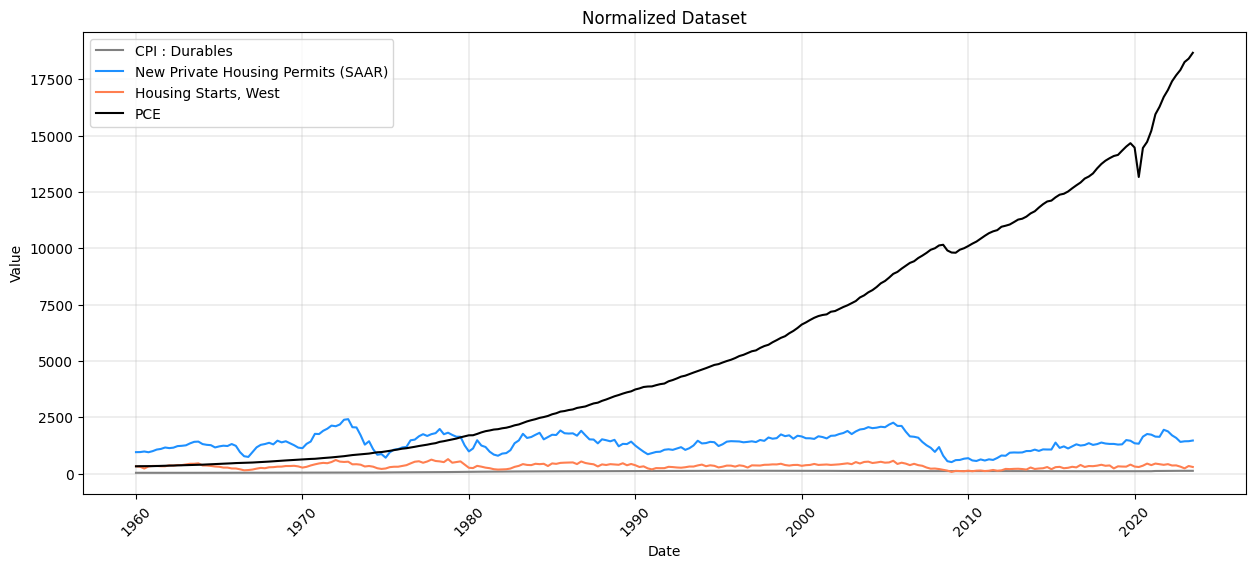

In [20]:
#plot after each transformation
plot_dataset(joined_dataset, "Normalized Dataset")

<div style="color:#00BFFF">

---

##### Save the final cleaned and preprocessed dataframe

In [21]:
# save the data
joined_dataset.to_csv("./results/merged_data/joined_dataset_transformed.csv",index=True)